In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
bnote=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')
bnote.columns=['variance','skewness','curtosis','entropy','class']

In [3]:
print(bnote.describe())

          variance     skewness     curtosis      entropy        class
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [4]:
correlation=bnote.corr('pearson')
correlation

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.263333,-0.380358,0.276666,-0.724655
skewness,0.263333,1.000000,-0.786729,-0.526896,-0.444281
curtosis,-0.380358,-0.786729,1.000000,0.319219,0.155346
entropy,0.276666,-0.526896,0.319219,1.000000,-0.023200
class,-0.724655,-0.444281,0.155346,-0.023200,1.000000


In [17]:
features=pd.DataFrame(bnote,columns=['variance'])
target=pd.DataFrame(bnote,columns=['class'])
df=pd.concat([features,target],axis=1)

In [18]:
X=np.array(features)
y=np.array(target)

In [19]:
X=X.reshape(-1,1)

In [20]:
scaler=MinMaxScaler()
x=scaler.fit_transform(X)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [34]:
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
y_pred=regressor.predict(x_test)

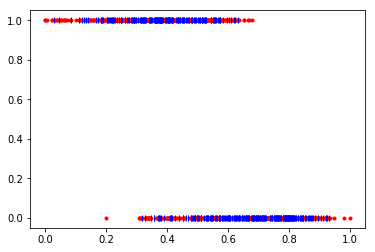

In [36]:
plt.plot(x_train,y_train,'r.',
         x_test,y_test,'b|')

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8495145631067961


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       231
           1       0.84      0.82      0.83       181

   micro avg       0.85      0.85      0.85       412
   macro avg       0.85      0.85      0.85       412
weighted avg       0.85      0.85      0.85       412

